In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

dataset = pd.read_csv("IRIS.csv")

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['species'], axis=1)
y = dataset['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [14]:
print(X,slice)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns] <class 'slice'>


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Accuracy: 0.9466666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.85      1.00      0.92        23
 Iris-virginica       1.00      0.83      0.90        23

       accuracy                           0.95        75
      macro avg       0.95      0.94      0.94        75
   weighted avg       0.95      0.95      0.95        75



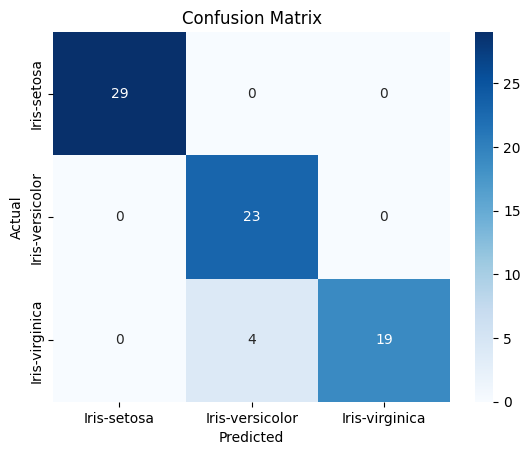

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=dataset['species'].unique()))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dataset['species'].unique(),
            yticklabels=dataset['species'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()